In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
data_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray'
print(os.listdir(data_dir))
train_dir = os.path.join(data_dir,'train/')
test_dir = os.path.join(data_dir,'test/')
print(train_dir)
print(os.listdir(train_dir))

['chest_xray', '__MACOSX', 'val', 'test', 'train']
/kaggle/input/chest-xray-pneumonia/chest_xray/train/
['PNEUMONIA', 'NORMAL']


In [11]:
normal_train_imgs = []
pneumonia_train_imgs = []
for img in os.listdir(os.path.join(train_dir,'NORMAL')):
    normal_train_imgs.append(os.path.join(train_dir+'NORMAL/',img))

for img in os.listdir(os.path.join(train_dir,'PNEUMONIA')):
    pneumonia_train_imgs.append(os.path.join(train_dir+'PNEUMONIA/',img))

In [12]:
print(normal_train_imgs[0])
print(pneumonia_train_imgs[0])

/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0771-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1180_virus_2010.jpeg


In [103]:
import matplotlib.pyplot as plt 
from matplotlib.image import imread as imr
from cv2 import imread
import numpy as np
import random
import cv2
print(len(normal_train_imgs))
print(len(pneumonia_train_imgs))

1341
3875


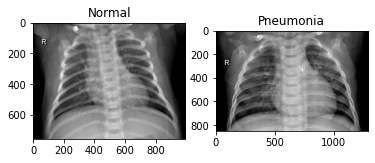

In [14]:
ran_idx = random.randint(0,1341)
fig,ax = plt.subplots(1,2)
ax[0].imshow(imr(normal_train_imgs[ran_idx]),cmap='gray');
ax[0].set_title('Normal');
ax[1].imshow(imr(pneumonia_train_imgs[ran_idx]),cmap='gray');
ax[1].set_title('Pneumonia');

In [15]:
img_width = []
img_height = []

for i in range(len(pneumonia_train_imgs)):
    im = imr(pneumonia_train_imgs[i])
    img_width.append(im.shape[0])
    img_height.append(im.shape[1])
print(np.average(img_width))
print(np.average(img_height))

825.0268387096775
1200.4836129032258


In [16]:
width = 825//10
height = 1200//10
target_size = (width,height)
input_size = (width,height,1)
print(input_size)

(82, 120, 1)


In [17]:
from keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rescale=1/255.,
                              rotation_range=0.2,
                              horizontal_flip=True,
                              shear_range=0.1)
test_gen = ImageDataGenerator(rescale=1/255.)
val_gen = ImageDataGenerator(rescale = 1/255.,
                            validation_split = 0.1)

In [18]:
train = train_gen.flow_from_directory(directory = train_dir,
                                     target_size=target_size,
                                     batch_size=128,
                                     color_mode = 'grayscale')
test = test_gen.flow_from_directory(directory = test_dir,
                                   target_size = target_size,
                                   batch_size = 128,
                                   color_mode='grayscale')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [19]:
val_dir = os.path.join(data_dir,'val')

val = val_gen.flow_from_directory(directory=val_dir,
                                 target_size = target_size,
                                 batch_size = 1,
                                 color_mode = 'grayscale')

Found 16 images belonging to 2 classes.


In [20]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,Activation

model = Sequential()
model.add(Conv2D(filters = 20, kernel_size =(7,7),padding='same',input_shape = input_size))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 80, kernel_size = (7,7),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 80, kernel_size = (7,7),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

2023-01-06 13:01:07.083665: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-06 13:01:07.084593: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-06 13:01:07.393362: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-06 13:01:07.394395: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-06 13:01:07.395310: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [22]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
opt = Adam(learning_rate=0.001)
loss = CategoricalCrossentropy()

model.compile(loss=loss,optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 82, 120, 20)       1000      
_________________________________________________________________
activation (Activation)      (None, 82, 120, 20)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 41, 60, 20)        0         
_________________________________________________________________
dropout (Dropout)            (None, 41, 60, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 41, 60, 80)        78480     
_________________________________________________________________
activation_1 (Activation)    (None, 41, 60, 80)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 30, 80)        0

In [29]:
history = model.fit_generator(train,epochs = 20,validation_data=test)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
41/41 [==============================] - 75s 2s/step - loss: 0.1152 - accuracy: 0.9772 - val_loss: 1.0710 - val_accuracy: 0.7388
Epoch 2/20
41/41 [==============================] - 65s 2s/step - loss: 0.1126 - accuracy: 0.9755 - val_loss: 0.8829 - val_accuracy: 0.7708
Epoch 3/20
41/41 [==============================] - 65s 2s/step - loss: 0.1091 - accuracy: 0.9755 - val_loss: 1.3303 - val_accuracy: 0.7276
Epoch 4/20
41/41 [==============================] - 65s 2s/step - loss: 0.0998 - accuracy: 0.9783 - val_loss: 1.3064 - val_accuracy: 0.7179
Epoch 5/20
41/41 [==============================] - 65s 2s/step - loss: 0.1028 - accuracy: 0.9760 - val_loss: 1.2713 - val_accuracy: 0.7035
Epoch 6/20
41/41 [==============================] - 65s 2s/step - loss: 0.0916 - accuracy: 0.9803 - val_loss: 1.2094 - val_accuracy: 0.7051
Epoch 7/20
41/41 [==============================] - 65s 2s/step - loss: 0.0930 - accuracy: 0.9803 - val_loss: 1.5421 - val_accuracy: 0.7196
Epoch 8/20
41/41 [==

In [30]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.115225,0.977186,1.070999,0.738782
1,0.112643,0.975460,0.882899,0.770833
2,0.109136,0.975460,1.330324,0.727564
3,0.099849,0.978336,1.306449,0.717949
4,0.102830,0.976035,1.271317,0.703526


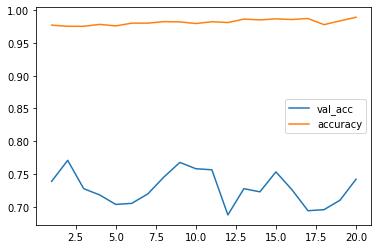

In [45]:
plt.plot(range(1,21),metrics['val_accuracy'],label='val_acc')
plt.plot(range(1,21),metrics['accuracy'],label='accuracy')
plt.legend()

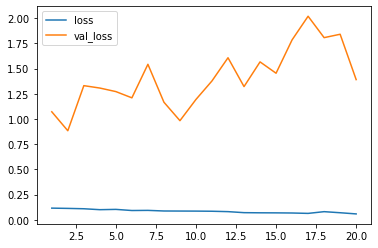

In [46]:
plt.plot(range(1,21),metrics['loss'],label='loss')
plt.plot(range(1,21),metrics['val_loss'],label='val_loss')
plt.legend()

In [69]:
print(len(os.listdir(val_dir + '/NORMAL')))
print(len(os.listdir(val_dir + '/PNEUMONIA')))

8
8


In [67]:
def gen_random_img_dir():
    rand = random.randint(0,7)
    sample_normal = os.path.join(val_dir+'/NORMAL',os.listdir(val_dir+'/NORMAL')[rand])
#     print(sample_normal)
    sample_pneumonia = os.path.join(val_dir + '/PNEUMONIA',os.listdir(val_dir + '/PNEUMONIA')[rand])
#     print(sample_pneumonia)
    return sample_normal,sample_pneumonia

In [68]:
gen_random_img_dir()

('/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg',
 '/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg')

In [72]:
print('[Loss,accuracy]:',model.evaluate_generator(val))

[Loss,accuracy]: [0.1900828331708908, 0.9375]


In [161]:
def make_pred(network=model,img_dir=None):
    if (img_dir == None):
        rand_ = random.randint(0,1)
        img_dir = gen_random_img_dir()[rand_]
    img = imr(img_dir)
    img_ = cv2.resize(img,(82,120))
    plt.imshow(img_)
    plt.title('Original: '+gen_random_img_dir()[rand_].split('/')[-2])
    img_ = img_.reshape(1,82,120,1)
    pred = network.predict(img_)
    s = val.class_indices
    a = pred.argmax()
    name = []
    for i in s:
        name.append(i)
    for i in range(len(s)):
        if(i==a):
            q = name[i]
    print(q)
    

PNEUMONIA


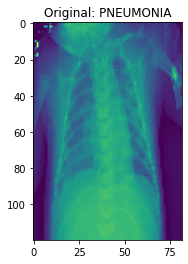

In [162]:
make_pred()

In [178]:
from sklearn.metrics import classification_report 
preds = np.round(model.predict(val))[:,1]
print(classification_report(val.classes,preds))

              precision    recall  f1-score   support

           0       0.43      0.38      0.40         8
           1       0.44      0.50      0.47         8

    accuracy                           0.44        16
   macro avg       0.44      0.44      0.44        16
weighted avg       0.44      0.44      0.44        16

